In [1]:
#for performing statistical and mathematical operations on the Telco churn Dataset
import numpy as np
#to read files and create dataframes such as panel data
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
#since this project is based on IPython Notebook
%matplotlib inline

In [2]:
#get the data of the  CSV file to a dataframe with pandas
df= pd.read_csv('Customer-Churn.csv')

In [3]:
#to get idea of the datafreme and check basically what are the columns in our telco customer churn table 
df.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod  MonthlyCharges TotalCharges Churn  
0              Yes  Electronic check           29.85        29.85    No  
1               No      Mailed check           56.95       1889.5    No

In [5]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.isnull().head(4)

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0          False    False       False   False         False          False   
1          False    False       False   False         False          False   
2          False    False       False   False         False          False   
3          False    False       False   False         False          False   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0            False           False         False             False   
1            False           False         False             False   
2            False           False         False             False   
3            False           False         False             False   

   TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  \
0        False        False            False             False   
1        False        False            False             False   
2        False        False            False             False   
3        False        False            False             False   

   MonthlyCharges  TotalCharges  Churn   Male     MM     OY     TY   Bank  \
0           False         False  False  False  False  False  False  False   
1           False         False  False  False  False  False  False  False   
2           False         False  False  False  False  False  False  False   
3           False         False  False  False  False  False  False  False   

    Card  Check  
0  False  False  
1  False  False  
2  False  False  
3  False  False

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

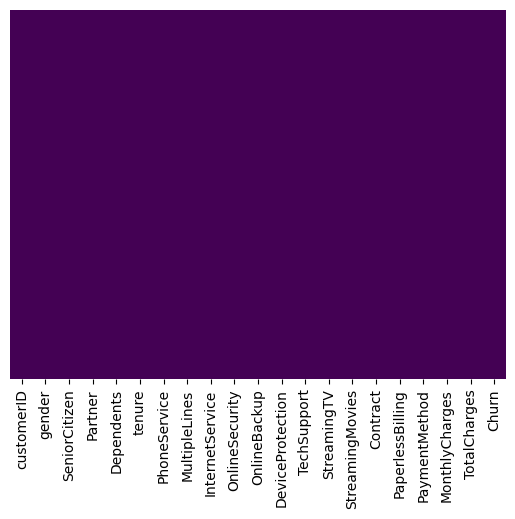

In [8]:
#since the churn dataframe is top big it's not showing all the datails.
#hence we need to go for a grphical representation to understand better
#it is now easy to get an brird,s eye view on the dataframe and see whether we are missing any values of not
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#performing some exploritory data analysis on churn data
#set the graph style
sns.set_style('whitegrid')

<Axes: xlabel='Churn', ylabel='count'>

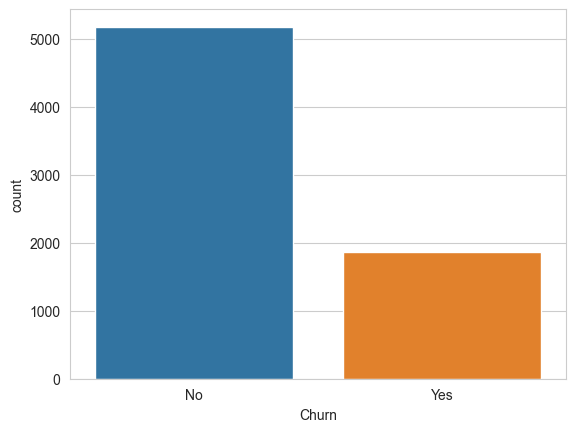

In [6]:
#ratio of the actual target classes
sns.countplot(x='Churn',data=df)

<Axes: xlabel='Churn', ylabel='count'>

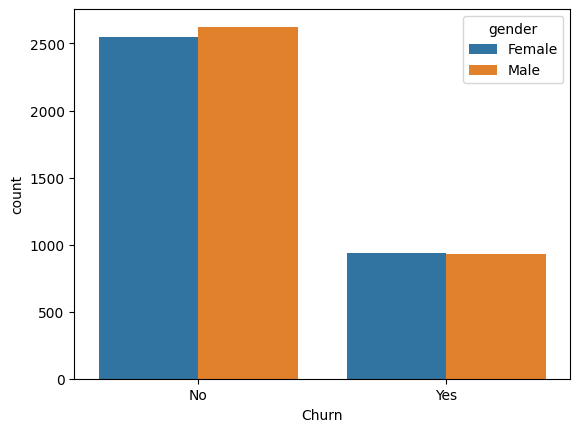

In [10]:
#Chern with relation to customer's gender
sns.countplot(x='Churn',hue='gender' ,data=df)

<Axes: xlabel='Churn', ylabel='count'>

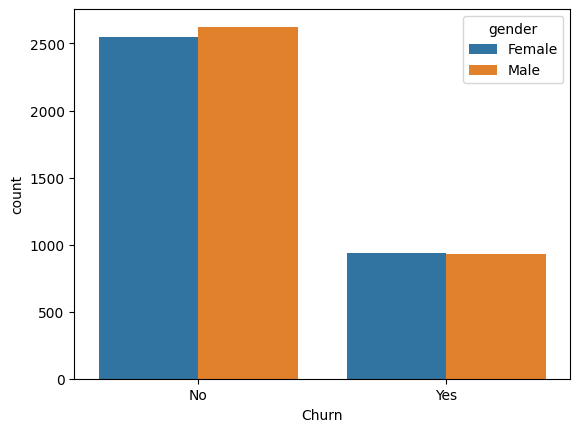

In [11]:
sns.countplot(x='Churn',hue='gender' ,data=df)

<Axes: xlabel='Churn', ylabel='count'>

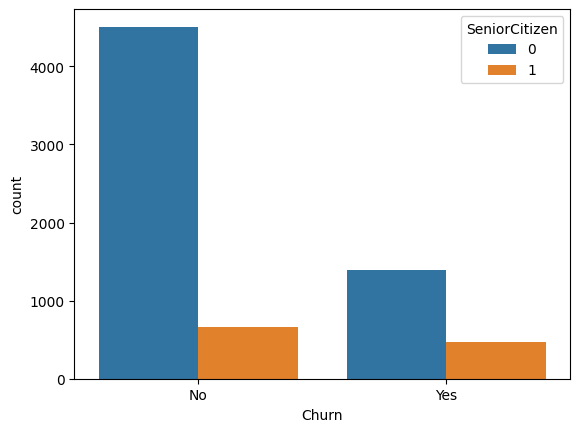

In [12]:
#Churn difference between senior citizens and junior citizens 
sns.countplot(x='Churn',hue='SeniorCitizen',data=df)


<Axes: xlabel='Churn', ylabel='count'>

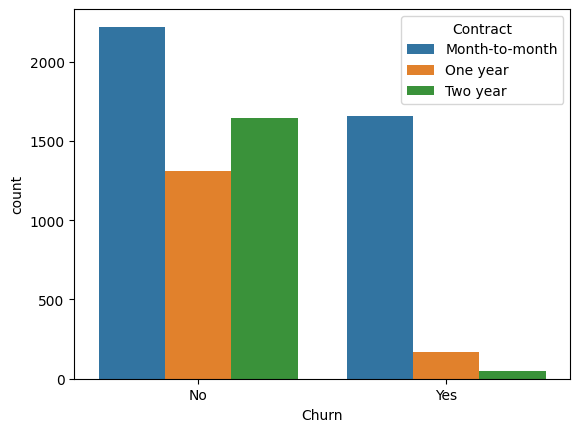

In [13]:
# Churn difference according to the contract method of the customers
sns.countplot(x='Churn',hue='Contract',data=df)

<Axes: xlabel='Churn', ylabel='count'>

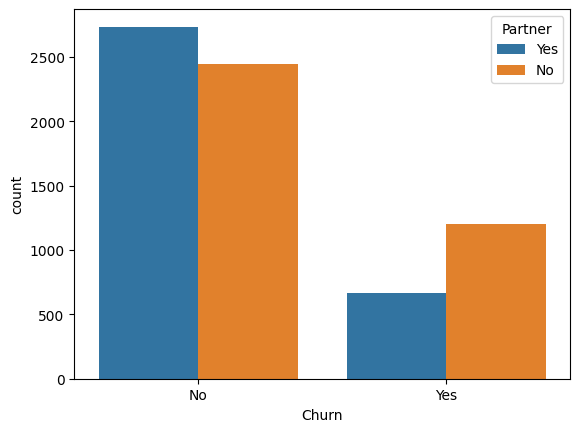

In [14]:
sns.countplot(x='Churn',hue='Partner',data=df)

In [15]:
yes_no_mapping={'Yes': 1,'No': 0}
df['Partner']=df['Partner'].map(yes_no_mapping)
df['Dependents']=df['Dependents'].map(yes_no_mapping)
df['PhoneService']=df['PhoneService'].map(yes_no_mapping)
df['PaperlessBilling']=df['PaperlessBilling'].map(yes_no_mapping)
df['Churn']=df['Churn'].map(yes_no_mapping)

In [16]:
df.head(2)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   

  PaperlessBilling     PaymentMethod MonthlyCharges  TotalCharges Churn  
0                1  Electronic check          29.85         29.85     0  
1                0      Mailed check          56.95        1889.5     0  

[2 rows x 21 columns]

In [17]:
InternetServiceMapping={'Yes': 1,'No': 0 ,'No internet service': 0 }
df['OnlineSecurity']=df['OnlineSecurity'].map(InternetServiceMapping)
df['OnlineBackup']=df['OnlineBackup'].map(InternetServiceMapping)
df['DeviceProtection']=df['DeviceProtection'].map(InternetServiceMapping)
df['TechSupport']=df['TechSupport'].map(InternetServiceMapping)
df['StreamingTV']=df['StreamingTV'].map(InternetServiceMapping)
df['StreamingMovies']=df['StreamingMovies'].map(InternetServiceMapping)

In [18]:
df.head(4)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService     MultipleLines InternetService  OnlineSecurity  ...  \
0                0  No phone service             DSL               0  ...   
1                1                No             DSL               1  ...   
2                1                No             DSL               1  ...   
3                0  No phone service             DSL               1  ...   
4                1                No     Fiber optic               0  ...   
...            ...               ...             ...             ...  ...   
7038             1               Yes             DSL               1  ...   
7039             1               Yes     Fiber optic               0  ...   
7040             0  No phone service             DSL               1  ...   
7041             1               Yes     Fiber optic               0  ...   
7042             1                No     Fiber optic               1  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month                1           Electronic check   
1           One year                0               Mailed check   
2     Month-to-month                1               Mailed check   
3           One year                0  Bank transfer (automatic)   
4     Month-to-month                1           Electronic check   
...              ...              ...                        ...   
7038        One year                1               Mailed check   
7039        One year                1    Credit card (automatic)   
7040  Month-to-month                1           Electronic check   
7041  Month-to-month                1               Mailed check   
7042        Two year                1  Bank transfer (automatic)   

     MonthlyCharges  TotalCharges Churn  
0             29.85         29.85     0  
1             56.95        1889.5     0  
2             53.85        108.15     1  
3             42.30       1840.75     0  
4             70.70        151.65     1  
...             ...           ...   ...  
7038          84.80        1990.5     0  
7039         103.20        7362.9     0  
7040          29.60        346.45     0  
7041          74.40         306.6     1  
7042         105.65        6844.5     0  

[7043 rows x 21 columns]

In [19]:
#mapping yes and no to 1 and 0do we can inject these data to a machine 
#learning algorithm
PhoneServiceMapping={'Yes':1,'No':0,'No phone service':0}
df['MultipleLines']=df['MultipleLines'].map(PhoneServiceMapping)

In [20]:
df.head(4)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
0                0              0             DSL               0  ...   
1                1              0             DSL               1  ...   
2                1              0             DSL               1  ...   
3                0              0             DSL               1  ...   
4                1              0     Fiber optic               0  ...   
...            ...            ...             ...             ...  ...   
7038             1              1             DSL               1  ...   
7039             1              1     Fiber optic               0  ...   
7040             0              0             DSL               1  ...   
7041             1              1     Fiber optic               0  ...   
7042             1              0     Fiber optic               1  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month                1           Electronic check   
1           One year                0               Mailed check   
2     Month-to-month                1               Mailed check   
3           One year                0  Bank transfer (automatic)   
4     Month-to-month                1           Electronic check   
...              ...              ...                        ...   
7038        One year                1               Mailed check   
7039        One year                1    Credit card (automatic)   
7040  Month-to-month                1           Electronic check   
7041  Month-to-month                1               Mailed check   
7042        Two year                1  Bank transfer (automatic)   

     MonthlyCharges  TotalCharges Churn  
0             29.85         29.85     0  
1             56.95        1889.5     0  
2             53.85        108.15     1  
3             42.30       1840.75     0  
4             70.70        151.65     1  
...             ...           ...   ...  
7038          84.80        1990.5     0  
7039         103.20        7362.9     0  
7040          29.60        346.45     0  
7041          74.40         306.6     1  
7042         105.65        6844.5     0  

[7043 rows x 21 columns]

In [21]:
DSLFiberMapping={'DSL':1, 'Fiber optic':1,'No':0}
df['InternetService']=df['InternetService'].map(DSLFiberMapping)

In [22]:
df.head(4)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              0                1               0  ...   
1                1              0                1               1  ...   
2                1              0                1               1  ...   
3                0              0                1               1  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              1                1               1  ...   
7039             1              1                1               0  ...   
7040             0              0                1               1  ...   
7041             1              1                1               0  ...   
7042             1              0                1               1  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month                1           Electronic check   
1           One year                0               Mailed check   
2     Month-to-month                1               Mailed check   
3           One year                0  Bank transfer (automatic)   
4     Month-to-month                1           Electronic check   
...              ...              ...                        ...   
7038        One year                1               Mailed check   
7039        One year                1    Credit card (automatic)   
7040  Month-to-month                1           Electronic check   
7041  Month-to-month                1               Mailed check   
7042        Two year                1  Bank transfer (automatic)   

     MonthlyCharges  TotalCharges Churn  
0             29.85         29.85     0  
1             56.95        1889.5     0  
2             53.85        108.15     1  
3             42.30       1840.75     0  
4             70.70        151.65     1  
...             ...           ...   ...  
7038          84.80        1990.5     0  
7039         103.20        7362.9     0  
7040          29.60        346.45     0  
7041          74.40         306.6     1  
7042         105.65        6844.5     0  

[7043 rows x 21 columns]

In [23]:
PaymentMapping= {'Bank transfer (automatic)' : 'Bank' , 'Credit card (automatic)' : 'Card' , 'Electronic check':'Check','Mailed check':'Check'}
df['PaymentMethod']=df['PaymentMethod'].map(PaymentMapping)

In [24]:
df.head(4)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              0                1               0  ...   
1                1              0                1               1  ...   
2                1              0                1               1  ...   
3                0              0                1               1  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              1                1               1  ...   
7039             1              1                1               0  ...   
7040             0              0                1               1  ...   
7041             1              1                1               0  ...   
7042             1              0                1               1  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract PaperlessBilling  PaymentMethod MonthlyCharges  \
0     Month-to-month                1          Check          29.85   
1           One year                0          Check          56.95   
2     Month-to-month                1          Check          53.85   
3           One year                0           Bank          42.30   
4     Month-to-month                1          Check          70.70   
...              ...              ...            ...            ...   
7038        One year                1          Check          84.80   
7039        One year                1           Card         103.20   
7040  Month-to-month                1          Check          29.60   
7041  Month-to-month                1          Check          74.40   
7042        Two year                1           Bank         105.65   

      TotalCharges Churn  
0            29.85     0  
1           1889.5     0  
2           108.15     1  
3          1840.75     0  
4           151.65     1  
...            ...   ...  
7038        1990.5     0  
7039        7362.9     0  
7040        346.45     0  
7041         306.6     1  
7042        6844.5     0  

[7043 rows x 21 columns]

In [25]:
ContractMapping = {'Month-to-month':'MM','One year':'OY','Two year':'TY'}
df ['Contract'] = df['Contract'].map(ContractMapping)

In [26]:
df.head(4)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              0                1               0  ...   
1                1              0                1               1  ...   
2                1              0                1               1  ...   
3                0              0                1               1  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              1                1               1  ...   
7039             1              1                1               0  ...   
7040             0              0                1               1  ...   
7041             1              1                1               0  ...   
7042             1              0                1               1  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0        MM   
1                    1            0            0                0        OY   
2                    0            0            0                0        MM   
3                    1            1            0                0        OY   
4                    0            0            0                0        MM   
...                ...          ...          ...              ...       ...   
7038                 1            1            1                1        OY   
7039                 1            0            1                1        OY   
7040                 0            0            0                0        MM   
7041                 0            0            0                0        MM   
7042                 1            1            1                1        TY   

     PaperlessBilling  PaymentMethod MonthlyCharges  TotalCharges Churn  
0                   1          Check          29.85         29.85     0  
1                   0          Check          56.95        1889.5     0  
2                   1          Check          53.85        108.15     1  
3                   0           Bank          42.30       1840.75     0  
4                   1          Check          70.70        151.65     1  
...               ...            ...            ...           ...   ...  
7038                1          Check          84.80        1990.5     0  
7039                1           Card         103.20        7362.9     0  
7040                1          Check          29.60        346.45     0  
7041                1          Check          74.40         306.6     1  
7042                1           Bank         105.65        6844.5     0  

[7043 rows x 21 columns]

In [27]:
pd.get_dummies(df['gender'],drop_first=True)

Male
0        0
1        1
2        1
3        1
4        0
...    ...
7038     1
7039     0
7040     0
7041     1
7042     1

[7043 rows x 1 columns]

In [28]:
sex = pd.get_dummies(df['gender'],drop_first=True)

In [29]:
sex.head(4)

Male
0        0
1        1
2        1
3        1
4        0
...    ...
7038     1
7039     0
7040     0
7041     1
7042     1

[7043 rows x 1 columns]

In [30]:
contract=pd.get_dummies(df['Contract'])

In [31]:
contract.head(4)

MM  OY  TY
0      1   0   0
1      0   1   0
2      1   0   0
3      0   1   0
4      1   0   0
...   ..  ..  ..
7038   0   1   0
7039   0   1   0
7040   1   0   0
7041   1   0   0
7042   0   0   1

[7043 rows x 3 columns]

In [32]:
PayMethod=pd.get_dummies(df['PaymentMethod'])

In [56]:
PayMethod.head(4)

Bank  Card  Check
0     0     0      1
1     0     0      1
2     0     0      1
3     1     0      0

In [34]:
sex.head(4) , PayMethod.head(4),contract.head(4)

(   Male
 0     0
 1     1
 2     1
 3     1
 4     0,
    Bank  Card  Check
 0     0     0      1
 1     0     0      1
 2     0     0      1
 3     1     0      0
 4     0     0      1,
    MM  OY  TY
 0   1   0   0
 1   0   1   0
 2   1   0   0
 3   0   1   0
 4   1   0   0)

In [35]:
df = pd.concat([df,sex,contract,PayMethod],axis=1)

In [36]:
df.head(4)

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              0                1               0  ...   
1                1              0                1               1  ...   
2                1              0                1               1  ...   
3                0              0                1               1  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              1                1               1  ...   
7039             1              1                1               0  ...   
7040             0              0                1               1  ...   
7041             1              1                1               0  ...   
7042             1              0                1               1  ...   

      MonthlyCharges  TotalCharges  Churn  Male  MM OY  TY Bank  Card Check  
0              29.85         29.85      0     0   1  0   0    0     0     1  
1              56.95        1889.5      0     1   0  1   0    0     0     1  
2              53.85        108.15      1     1   1  0   0    0     0     1  
3              42.30       1840.75      0     1   0  1   0    1     0     0  
4              70.70        151.65      1     0   1  0   0    0     0     1  
...              ...           ...    ...   ...  .. ..  ..  ...   ...   ...  
7038           84.80        1990.5      0     1   0  1   0    0     0     1  
7039          103.20        7362.9      0     0   0  1   0    0     1     0  
7040           29.60        346.45      0     0   1  0   0    0     0     1  
7041           74.40         306.6      1     1   1  0   0    0     0     1  
7042          105.65        6844.5      0     1   0  0   1    1     0     0  

[7043 rows x 28 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [38]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [40]:
df.drop(['customerID','gender','PaymentMethod','Contract'], axis=1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int64  
 5   MultipleLines     7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   OnlineBackup      7043 non-null   int64  
 9   DeviceProtection  7043 non-null   int64  
 10  TechSupport       7043 non-null   int64  
 11  StreamingTV       7043 non-null   int64  
 12  StreamingMovies   7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7032 non-null   float64
 16  Churn             7043 non-null   int64  


In [42]:
df.head(4)

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                1               0             1                 0  ...   
1                1               1             0                 1  ...   
2                1               1             1                 0  ...   
3                1               1             0                 1  ...   

   MonthlyCharges  TotalCharges  Churn  Male  MM  OY  TY  Bank  Card  Check  
0           29.85         29.85      0     0   1   0   0     0     0      1  
1           56.95       1889.50      0     1   0   1   0     0     0      1  
2           53.85        108.15      1     1   1   0   0     0     0      1  
3           42.30       1840.75      0     1   0   1   0     1     0      0  

[4 rows x 24 columns]

In [43]:
from sklearn.preprocessing import LabelEncoder
lblEnc=LabelEncoder()
tf=df.copy()

for i in df.columns:
    tf[i]=lblEnc.fit_transform(df[i])

In [59]:
tf.head(10)

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
0              0        1           0       1             0              0   
1              0        0           0      34             1              0   
2              0        0           0       2             1              0   
3              0        0           0      45             0              0   
4              0        0           0       2             1              0   
5              0        0           0       8             1              1   
6              0        0           1      22             1              1   
7              0        0           0      10             0              0   
8              0        1           0      28             1              1   
9              0        0           1      62             1              0   

   InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                1               0             1                 0   
1                1               1             0                 1   
2                1               1             1                 0   
3                1               1             0                 1   
4                1               0             0                 0   
5                1               0             0                 1   
6                1               0             1                 0   
7                1               1             0                 0   
8                1               0             0                 1   
9                1               1             1                 0   

   TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  \
0            0            0                0                 1   
1            0            0                0                 0   
2            0            0                0                 1   
3            1            0                0                 0   
4            0            0                0                 1   
5            0            1                1                 1   
6            0            1                0                 1   
7            0            0                0                 0   
8            1            1                1                 1   
9            0            0                0                 0   

   MonthlyCharges  TotalCharges  Churn  Male  MM  OY  TY  Bank  Card  Check  
0             142            74      0     0   1   0   0     0     0      1  
1             498          3624      0     1   0   1   0     0     0      1  
2             436           536      1     1   1   0   0     0     0      1  
3             266          3570      0     1   0   1   0     1     0      0  
4             729           674      1     0   1   0   0     0     0      1  
5            1274          2173      1     0   1   0   0     0     0      1  
6            1075          3673      0     1   1   0   0     0     1      0  
7             140          1145      0     0   1   0   0     0     0      1  
8            1371          4384      1     0   1   0   0     0     0      1  
9             482          4631      0     1   0   1   0     1     0      0

In [45]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   SeniorCitizen     7043 non-null   int64
 1   Partner           7043 non-null   int64
 2   Dependents        7043 non-null   int64
 3   tenure            7043 non-null   int64
 4   PhoneService      7043 non-null   int64
 5   MultipleLines     7043 non-null   int64
 6   InternetService   7043 non-null   int64
 7   OnlineSecurity    7043 non-null   int64
 8   OnlineBackup      7043 non-null   int64
 9   DeviceProtection  7043 non-null   int64
 10  TechSupport       7043 non-null   int64
 11  StreamingTV       7043 non-null   int64
 12  StreamingMovies   7043 non-null   int64
 13  PaperlessBilling  7043 non-null   int64
 14  MonthlyCharges    7043 non-null   int64
 15  TotalCharges      7043 non-null   int64
 16  Churn             7043 non-null   int64
 17  Male              7043 non-null  

In [46]:
#Seperate the dataset to x and y
#y is the column that we are trying to prredict
X = tf.drop('Churn',axis=1)
Y = tf['Churn']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=0) 

In [48]:
print(X_train.shape,'----> Trainig Feature Shape')
print(X_test.shape,'----> Testing Feature Shape')
print(Y_train.shape,'----> Trainig Labels Shape')
print(Y_test.shape,'----> Testing Labels Shape')

(5282, 23) ----> Trainig Feature Shape
(1761, 23) ----> Testing Feature Shape
(5282,) ----> Trainig Labels Shape
(1761,) ----> Testing Labels Shape


In [50]:
def model_acc(model):
    model.fit(X_train,Y_train)
    acc=model.score(X_test,Y_test)
    print(str(model)+'-->'+str(acc))

In [51]:
from sklearn.tree import DecisionTreeClassifier
churn_log_model = DecisionTreeClassifier(criterion='entropy',random_state=100)
model_acc(churn_log_model)
from sklearn.ensemble import RandomForestClassifier
churn = RandomForestClassifier(n_estimators=100)
model_acc(churn)

DecisionTreeClassifier(criterion='entropy', random_state=100)-->0.7234525837592277
RandomForestClassifier()-->0.7904599659284497


In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
fc = GridSearchCV(estimator=churn, param_grid=param_grid, cv= 5)
fc.fit(X_train, Y_train)

C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [62]:
fc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [63]:
fc

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [64]:
fd=fc.best_params_

In [65]:
fc.score(X_train,Y_train)

0.832828474062855

In [66]:
churn_predictions= fc.predict(X_test)

In [67]:
churn_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(Y_test,churn_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1298
           1       0.64      0.47      0.54       463

    accuracy                           0.79      1761
   macro avg       0.73      0.69      0.70      1761
weighted avg       0.78      0.79      0.78      1761



In [70]:
X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Male', 'MM',
       'OY', 'TY', 'Bank', 'Card', 'Check'],
      dtype='object')

In [71]:
fc.predict([[0,0,0,2,1,0,1,1,1,0,0,0,0,1,436,536,1,1,0,0,0,0,1]])

C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [72]:
import sklearn.metrics as sm

In [73]:
accuracy_of_churn_model = sm.accuracy_score(Y_test,churn_predictions)
print('Accuracy Score ===',str(accuracy_of_churn_model))

Accuracy Score === 0.7904599659284497


In [74]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [75]:
get_ipython().run_line_magic('matplotlib','inline')
mat=confusion_matrix(Y_test,churn_predictions)

Text(110.44999999999997, 0.5, 'Predicted class')

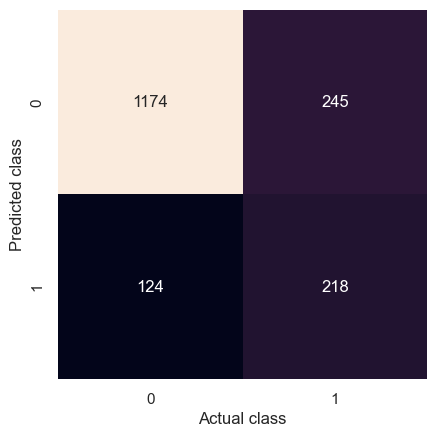

In [76]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False )
plt.xlabel('Actual class')
plt.ylabel('Predicted class')

In [77]:
from sklearn import metrics
cm = metrics.confusion_matrix(Y_test,churn_predictions) 
print(cm)
accuracy = metrics.accuracy_score(Y_test,churn_predictions) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(Y_test,churn_predictions) 
print("Precision score:",precision)
recall = metrics.recall_score(Y_test,churn_predictions) 
print("Recall score:",recall)

[[1174  124]
 [ 245  218]]
Accuracy score: 0.7904599659284497
Precision score: 0.6374269005847953
Recall score: 0.4708423326133909


In [78]:
import pickle
with open ('predictor.pickle','wb')as file:
    pickle.dump(fc,file)

In [79]:
X_train.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Male', 'MM',
       'OY', 'TY', 'Bank', 'Card', 'Check'],
      dtype='object')

In [80]:
fc.predict([[0,0,0,2,1,0,1,1,1,0,0,0,0,1,436,536,1,1,0,0,0,0,1]])

C:\Users\Hasaranaga\Desktop\Customer_Churn\model\env\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [1]:
fc.predict([[0,0,0,2,1,0,1,1,1,0,0,0,0,1,436,536,1,1,0,0,0,0,1]])

NameError: name 'fc' is not defined